<a href="https://colab.research.google.com/github/EnriqueProjectsIA/Pytorch-teaching/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# for dealing with datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Creating moke data

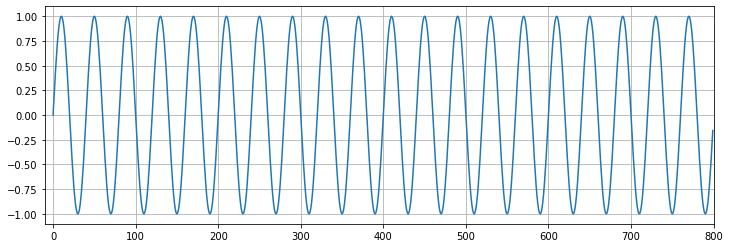

In [ ]:
x = torch.linspace(0,799,800)
y = torch.sin(x*2*3.1416/40)
plt.figure(figsize = (12,4))
plt.grid(True)
plt.plot(x.numpy(),y.numpy())
plt.xlim([-10,801])
plt.show()

* We create a sequence train/test split. 
* The sequence train test split is not random.
* We want to predict final portion of the sequence and forecast into the future.
* We also want the NN to learn the structure of the sequence and how it evolves


In [ ]:
testSize = 40
trainSet = y[:-testSize]
testSet = y[-testSize:]

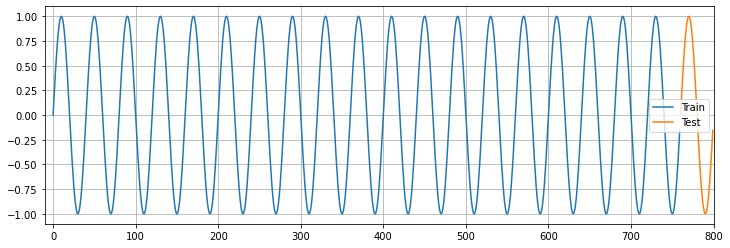

In [ ]:
x = torch.linspace(0,799,800)
y = torch.sin(x*2*3.1416/40)
plt.figure(figsize = (12,4))
plt.grid(True)
plt.plot(x.numpy()[:-testSize],trainSet.numpy(), label = 'Train')
plt.plot(x.numpy()[-testSize:],testSet.numpy(), label = 'Test')
plt.xlim([-10,801])
plt.legend()
plt.show()

### Function to create many to one

In [ ]:
def createData(seq,ws):

  outPut = [] #([0,1,2,3],[4]),([1,2,3,4],[5]),...
  Len = len(seq)
  for i in range(Len-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    outPut.append((window,label))
  return outPut

In [ ]:
window_size = 40
trainData = createData(trainSet, window_size)

* Input_size is 1 in our case because we only have one feature per time stamp (one column time). However, that can be easily expanded. 


In [ ]:
class LSTMNN(nn.Module):
  def __init__(self,input_size=1, hidden_size = 50,out_put =1):
    super().__init__()
    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size,hidden_size)
    self.linear = nn.Linear(hidden_size,out_put)
    # (H,C) hidden state and cell state
    # The hidden and cell states are initialized as zeros
    self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))

  def forward(self,seq):
    lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
    pred = self.linear(lstm_out.view(len(seq),-1))
    return pred[-1] # Only the last value is the forecast

In [ ]:
torch.manual_seed(42)
model = LSTMNN()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
model

LSTMNN(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
for p in model.parameters():
  print(p.numel())

200
10000
200
200
50
1


epoch 0 loss 0.09212874621152878
Performance on test range:0.6071589589118958


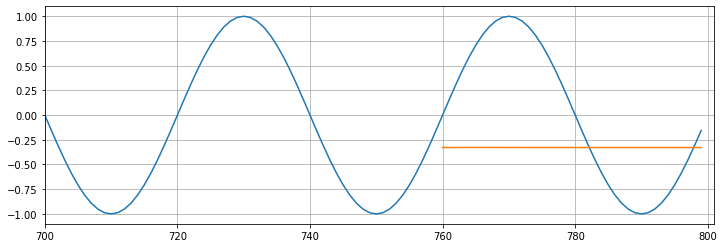

epoch 1 loss 0.06506765633821487
Performance on test range:0.5650988221168518


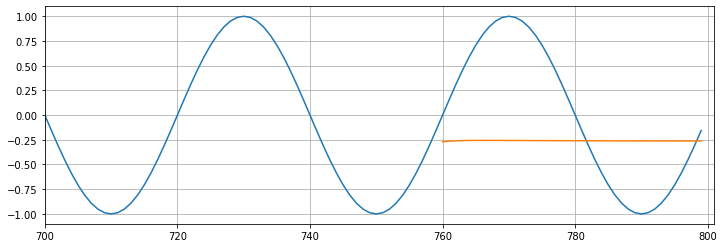

epoch 2 loss 0.04198050498962402
Performance on test range:0.5199717283248901


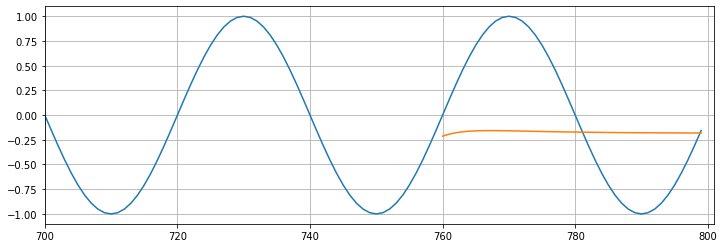

epoch 3 loss 0.01784278079867363
Performance on test range:0.422099769115448


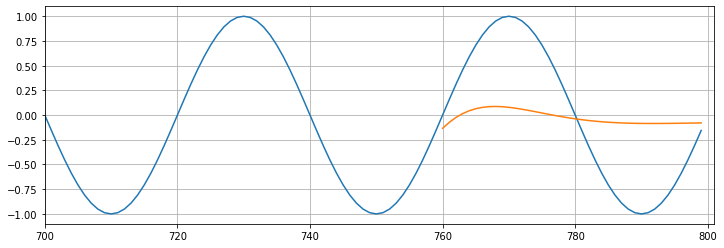

epoch 4 loss 0.002887103008106351
Performance on test range:0.16624148190021515


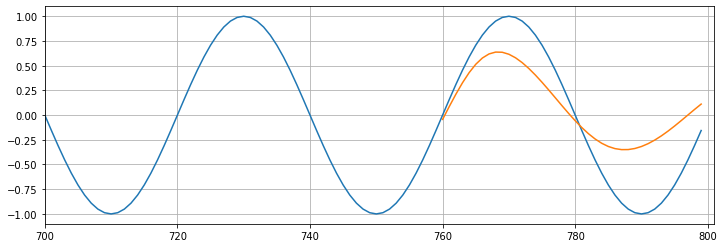

epoch 5 loss 0.0003200768551323563
Performance on test range:0.030554458498954773


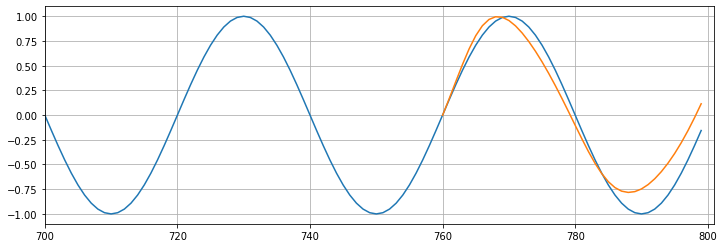

epoch 6 loss 0.0001296920672757551
Performance on test range:0.014990216121077538


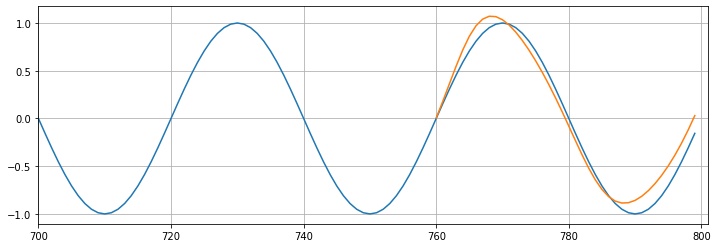

epoch 7 loss 0.00012006635370198637
Performance on test range:0.011856693774461746


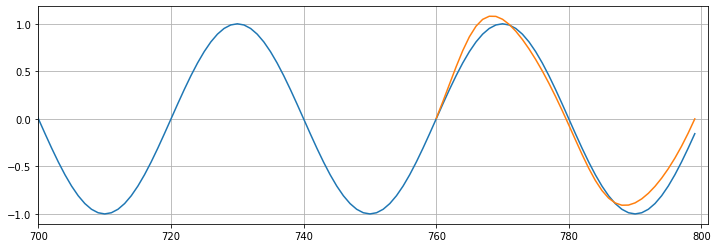

epoch 8 loss 0.00012655621685553342
Performance on test range:0.010163778439164162


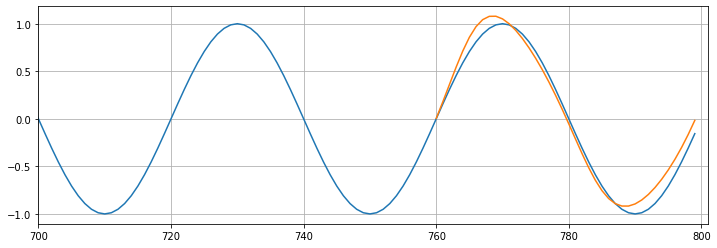

epoch 9 loss 0.0001319547591265291
Performance on test range:0.008897600695490837


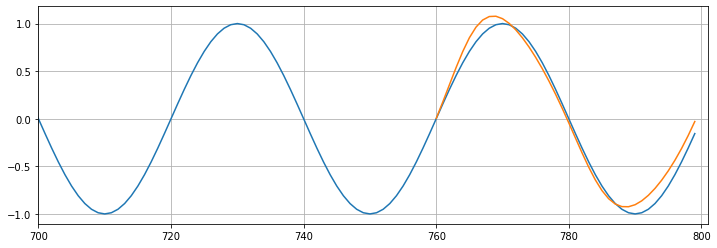

epoch 10 loss 0.0001345030323136598
Performance on test range:0.007882238365709782


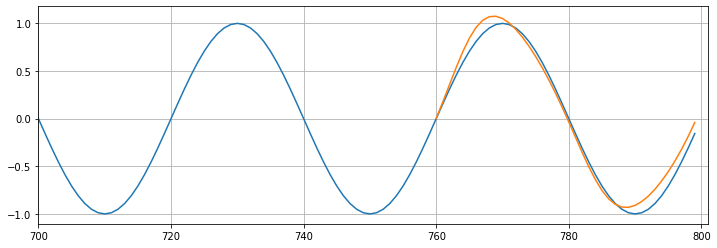

epoch 11 loss 0.00013458114699460566
Performance on test range:0.007052336819469929


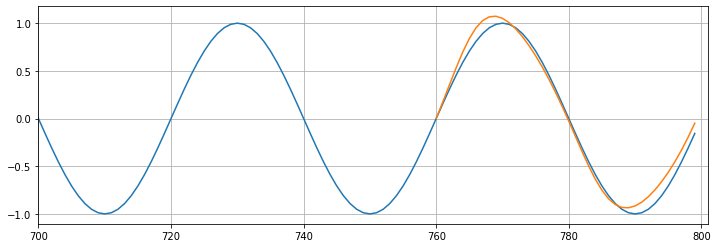

epoch 12 loss 0.0001327927748207003
Performance on test range:0.00636683264747262


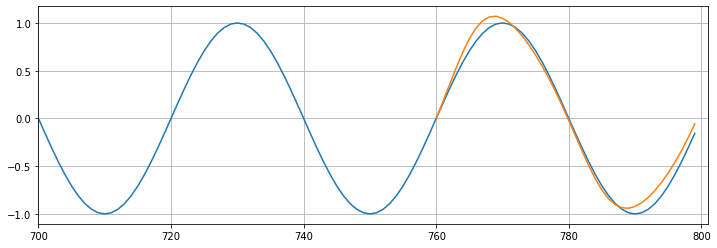

epoch 13 loss 0.00012966558279003948
Performance on test range:0.0057954685762524605


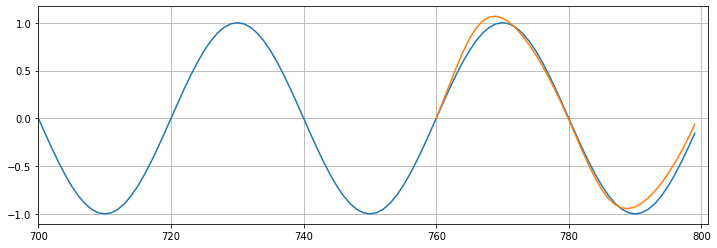

epoch 14 loss 0.00012561386392917484
Performance on test range:0.0053154537454247475


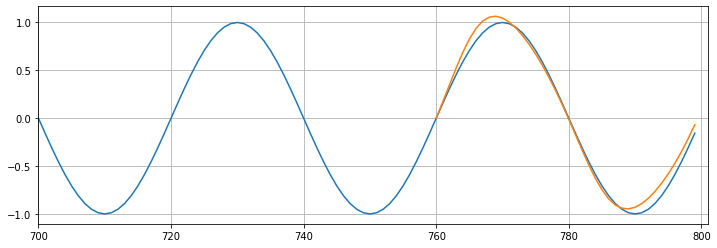

In [ ]:
torch.manual_seed(42)
model = LSTMNN()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

epochs = 15
future = 40

for i in range(epochs):

  for seq, y_train in trainData:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f'epoch {i} loss {loss.item()}')

  preds = trainSet[-window_size:].tolist()

  for f in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
      model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
      preds.append(model(seq).item())
  loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
  print(f'Performance on test range:{loss}')

  plt.figure(figsize=(12,4))
  plt.plot(y.numpy())
  plt.plot(range(760,800),preds[window_size:])
  plt.xlim([700,801])
  plt.grid(True)
  plt.show()



In [ ]:
epochs = 15
window_size = 40
future = 40

allData = createData(y,window_size)
len(allData)

760

## Now we predict into the furure

### Train on all the data

In [ ]:
import time
torch.manual_seed(42)
model = LSTMNN()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
start_time = time.time()
for i in range(epochs):

  for seq, y_train in trainData:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f'epoch {i} loss {loss.item()}')

  preds = trainSet[-window_size:].tolist()

total_time = time.time()-start_time
print(total_time/60)

epoch 0 loss 0.09212874621152878
epoch 1 loss 0.06506765633821487
epoch 2 loss 0.04198050498962402
epoch 3 loss 0.01784278079867363
epoch 4 loss 0.002887103008106351
epoch 5 loss 0.0003200768551323563
epoch 6 loss 0.0001296920672757551
epoch 7 loss 0.00012006635370198637
epoch 8 loss 0.00012655621685553342
epoch 9 loss 0.0001319547591265291
epoch 10 loss 0.0001345030323136598
epoch 11 loss 0.00013458114699460566
epoch 12 loss 0.0001327927748207003
epoch 13 loss 0.00012966558279003948
epoch 14 loss 0.00012561386392917484
1.1587396383285522


In [ ]:
preds = y[-window_size:].tolist()

for i in range(future):
  seq = torch.FloatTensor(preds[-window_size:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())


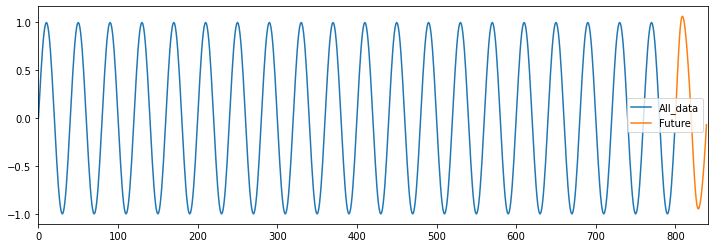

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(y.numpy(),label = 'All_data')
plt.plot(range(800,800+future),preds[window_size:], label = 'Future')
plt.xlim([0,841])
plt.legend()
plt.show()

# More realistic case study

Data set can be found [here](https://drive.google.com/file/d/1ZNKNz_ofXZSaD9mmtsyehlgBdIcfdAd6/view?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
# for dealing with datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data_sets/Kaggle/Alcohol_Sales.csv',index_col = 0 ,parse_dates = True)
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [3]:
print(len(df))
df = df.dropna()
print(len(df))

325
325


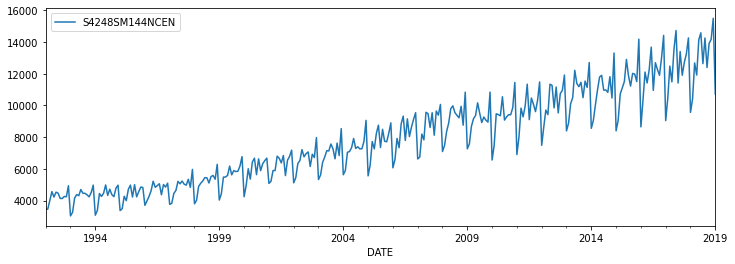

In [ ]:
df.plot(figsize = (12,4))

In [ ]:
Y = df['S4248SM144NCEN'].values.astype(float)

In [ ]:
window = 12
train_set = Y[:-window]
test_set = Y[window:]

* There is one order of magnitude between the minimum and the maximum value. Therefore a normalization step is required.

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_set.reshape(-1,1))
train_norm = scaler.transform(train_set.reshape(-1,1))

In [4]:
def createData(seq,ws):

  outPut = [] #([0,1,2,3],[4]),([1,2,3,4],[5]),...
  Len = len(seq)
  for i in range(Len-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    outPut.append((window,label))
  return outPut

In [ ]:
train_norm = torch.FloatTensor(train_norm).view(-1)

In [ ]:
train_data = createData(train_norm,12)

*325-12-12
length of the dataset 325
length of the test set 12
length of the window

In [ ]:
len(train_data)

301

## Define LSTM

In [ ]:
class LSTMNN(nn.Module):
  def __init__(self,input_size=1, hidden_size = 100,out_put =1):
    super().__init__()
    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size,hidden_size)
    self.linear = nn.Linear(hidden_size,out_put)
    # (H,C) hidden state and cell state
    # The hidden and cell states are initialized as zeros
    self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))

  def forward(self,seq):
    lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
    pred = self.linear(lstm_out.view(len(seq),-1))
    return pred[-1] # Only the last value is the forecast

In [ ]:
import time
torch.manual_seed(42)
model = LSTMNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
start_time = time.time()
epochs = 100
for i in range(epochs):

  for seq, y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f'epoch {i} loss {loss.item()}')


total_time = time.time()-start_time
print(total_time/60)

In [ ]:
future = 12
preds = train_norm[-window:].tolist()
model.eval()
for i in range(future):
  seq = torch.FloatTensor(preds[-window:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())

In [ ]:
true_preds = scaler.inverse_transform(np.array(preds[window:]).reshape(-1,1))

In [ ]:
X = np.arange('2018-02-01','2019-02-01', dtype = 'datetime64[M]')

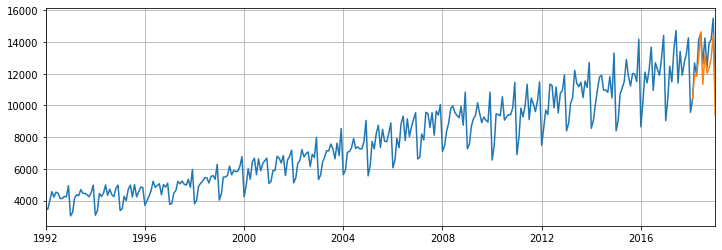

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(df['S4248SM144NCEN'])
plt.plot(X,true_preds)
plt.grid(True)
plt.autoscale(axis = 'x', tight=True)
plt.show()

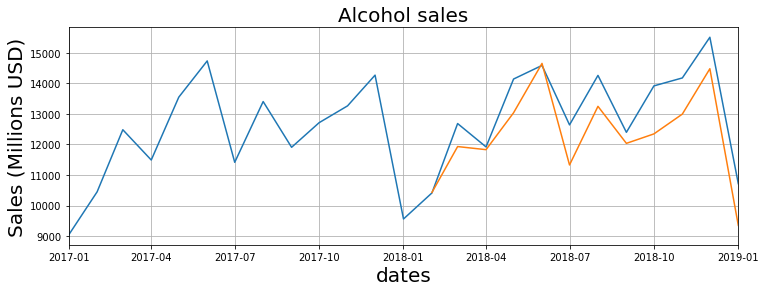

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(X,true_preds)
plt.grid(True)
plt.autoscale(axis = 'x', tight=True)
plt.title('Alcohol sales', size = 20)
plt.xlabel('dates', size = 20)
plt.ylabel('Sales (Millions USD)', size = 20)
plt.show()

### Forecasting

In [ ]:
torch.manual_seed(42)
model = LSTMNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
# We use all the data
window = 12
y_norm = scaler.fit_transform(Y.reshape(-1,1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = createData(y_norm,window)


start_time = time.time()
epochs = 200
for i in range(epochs):

  for seq, y_train in all_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f'epoch {i} loss {loss.item()}')


total_time = time.time()-start_time
print(total_time/60)

In [ ]:
future = 12
window = 12
L = len(Y)
preds = y_norm[-window:].tolist()
model.eval()
for i in range(future):
  seq = torch.FloatTensor(preds[-window:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())
true_preds = scaler.inverse_transform(np.array(preds).reshape(-1,1))

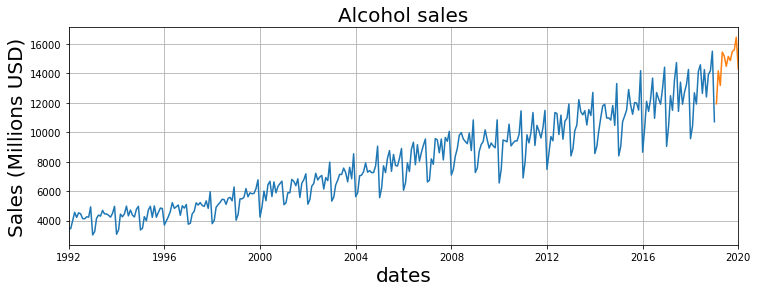

In [ ]:
X = np.arange('2019-02-01','2020-02-01', dtype = 'datetime64[M]')
plt.figure(figsize = (12,4))
plt.plot(df['S4248SM144NCEN'])
plt.plot(X,true_preds[window:])
plt.grid(True)
plt.autoscale(axis = 'x', tight=True)
plt.title('Alcohol sales', size = 20)
plt.xlabel('dates', size = 20)
plt.ylabel('Sales (Millions USD)', size = 20)
plt.show()

# Other real example:

* One can accede to the federal reserve economic database following the [link](https://fred.stlouisfed.org/series/IPG2211A2N).
* Use the scroll bar to select the period that we want to analyze and forecast.
* At the upper right corner one can download the dataset.
* The dataset is about electricity and gas utility production for the period selected.

In [15]:
import pandas as pd
import numpy as np
import time
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
# for dealing with datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.preprocessing import MinMaxScaler

In [5]:
def createData(seq,ws):

  outPut = [] #([0,1,2,3],[4]),([1,2,3,4],[5]),...
  Len = len(seq)
  for i in range(Len-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    outPut.append((window,label))
  return outPut

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Data_sets/Kaggle/IPG2211A2N.csv',index_col = 0 ,parse_dates = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 510 entries, 1980-02-01 to 2022-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


In [8]:
df.dropna(inplace = True)

In [9]:
print(f'The dataframe length is: {len(df)}')
df.head()

The dataframe length is: 510


,IPG2211A2N
DATE,
1980-02-01,63.8023
1980-03-01,59.9691
1980-04-01,52.3161
1980-05-01,49.0535
1980-06-01,51.6418


The data has monthly entrances. Therefore, the window time will be set to 12 (months = 1 year).

In [10]:
window = 12
Y = df['IPG2211A2N'].values.astype(float)
# Prepare train and test set
train_set = Y[:-window]
test_set = Y[-window:]

* The data is normalized

In [11]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_set.reshape(-1,1))
train_norm = scaler.transform(train_set.reshape(-1,1))

In [12]:
train_norm = torch.FloatTensor(train_norm).view(-1)
train_data = createData(train_norm,12)

* We prepare the LSTM class

In [13]:
class LSTMNN(nn.Module):
  def __init__(self,input_size=1, hidden_size = 100,out_put =1):
    super().__init__()
    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size,hidden_size)
    self.linear = nn.Linear(hidden_size,out_put)
    # (H,C) hidden state and cell state
    # The hidden and cell states are initialized as zeros
    self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))

  def forward(self,seq):
    lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
    pred = self.linear(lstm_out.view(len(seq),-1))
    return pred[-1] # Only the last value is the forecast

In [23]:
model

LSTMNN(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:

torch.manual_seed(42)
model = LSTMNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
start_time = time.time()
epochs = 200
for i in range(epochs):

  for seq, y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f'epoch {i} loss {loss.item()}')


total_time = time.time()-start_time
print(total_time/60)

In [30]:
future = 12
preds = train_norm[-window:].tolist()
model.eval()
for i in range(future):
  seq = torch.FloatTensor(preds[-window:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())
true_preds = scaler.inverse_transform(np.array(preds[window:]).reshape(-1,1))


In [28]:
df.tail(13)

,IPG2211A2N
DATE,
2021-07-01,112.2001
2021-08-01,114.0978
2021-09-01,100.3642
2021-10-01,91.1548
2021-11-01,97.8449
2021-12-01,108.3546
2022-01-01,126.5273
2022-02-01,114.3064
2022-03-01,102.7847


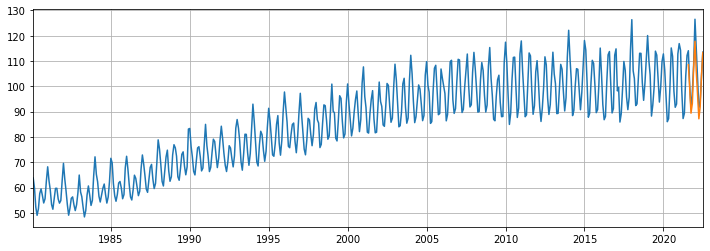

In [33]:
X = np.arange('2021-08-01','2022-08-01', dtype = 'datetime64[M]')
plt.figure(figsize = (12,4))
plt.plot(df['IPG2211A2N'])
plt.plot(X,true_preds)
plt.grid(True)
plt.autoscale(axis = 'x', tight=True)
plt.show()

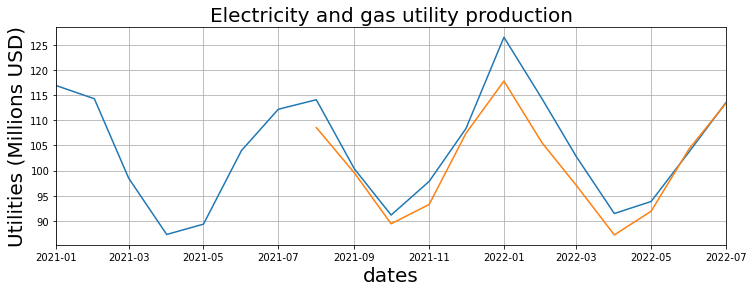

In [37]:
plt.figure(figsize = (12,4))
plt.plot(df['IPG2211A2N']['2021-01-01':])
plt.plot(X,true_preds)
plt.grid(True)
plt.autoscale(axis = 'x', tight=True)
plt.title('Electricity and gas utility production', size = 20)
plt.xlabel('dates', size = 20)
plt.ylabel('Utilities (Millions USD)', size = 20)
plt.show()

### Forecasting

In [ ]:
torch.manual_seed(42)
model = LSTMNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
# We use all the data
window = 12
y_norm = scaler.fit_transform(Y.reshape(-1,1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = createData(y_norm,window)


start_time = time.time()
epochs = 200
for i in range(epochs):

  for seq, y_train in all_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f'epoch {i} loss {loss.item()}')


total_time = time.time()-start_time
print(total_time/60)

In [17]:
future = 12
window = 12
L = len(Y)
preds = y_norm[-window:].tolist()
model.eval()
for i in range(future):
  seq = torch.FloatTensor(preds[-window:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())
true_preds = scaler.inverse_transform(np.array(preds).reshape(-1,1))

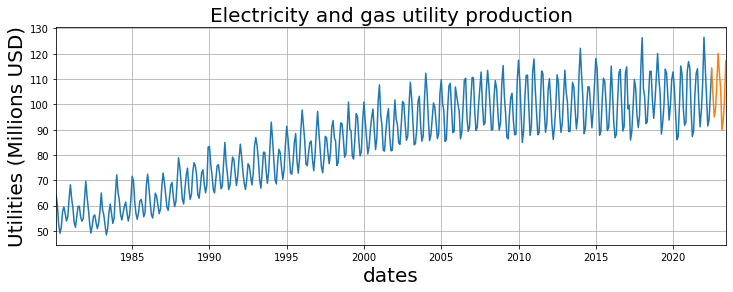

In [22]:
X = np.arange('2022-07-01','2023-07-01', dtype = 'datetime64[M]')
plt.figure(figsize = (12,4))
plt.plot(df['IPG2211A2N'])
plt.plot(X,true_preds[window:])
plt.grid(True)
plt.autoscale(axis = 'x', tight=True)
plt.title('Electricity and gas utility production', size = 20)
plt.xlabel('dates', size = 20)
plt.ylabel('Utilities (Millions USD)', size = 20)
plt.show()